# Density Plots


**Normal Distribution**

In [ ]:
!pip install statsmodels

mean: 0.49701281810326087
var: 0.16963762566599166


<IPython.core.display.Javascript object>


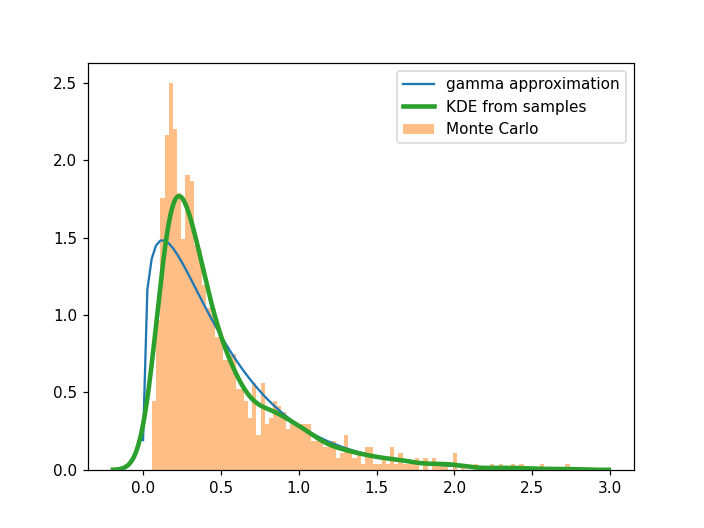

In [1]:
%matplotlib notebook
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma, lognorm
import math
import statsmodels.api as sm

t = 1.5
a = 0.5
n = 100
trials = 1000
points = 100
p = np.zeros(trials)
A = np.zeros([trials])


def squarebrownbridge(t,a,n):
    Bs = np.zeros(n)
    Bt = np.zeros(n)
    ds = t/n
    
    for i in range(1,n):
        sign = np.random.choice([-1,1])
        Bs[i] = Bs[i-1] + sign*np.sqrt(ds)
    
    for i in range(1,n):
        Bt[i] = Bs[i] - (i+1)/n*Bs[n-1] + a*(i+1)/n
        p = np.dot(Bt,Bt.T)*ds
    return Bt, p

for i in range(trials):
    #A[i] = brownsum(t,n)[0][n-1]
    p[i] = squarebrownbridge(t,a,n)[1]
    
ymin = 0.0001
ymax = max(p)
y = np.linspace(ymin,ymax,points)


print("mean:",np.mean(p))
print("var:",np.var(p))

beta = (5/4) + (5*a**4)/(4*a**2*t + t**2)
alpha = (2/15)*(t**2*(t + 4*a**2)/(t + 2*a**2))

ex = (t*a**2/3) + ((t**2)/6)
var = (4*(a**2)*t**3 + t**4)
sigma = (math.log(1 + var/(ex**2)))**0.5
mu = -0.5*sigma**2 + math.log(var)

plt.figure()
plt.plot(y,gamma.pdf(y,beta,0,alpha),label = "gamma approximation")
k2 = plt.hist(p,density=True,histtype = 'stepfilled', alpha = 0.5, bins = points,label="Monte Carlo")

kde = sm.nonparametric.KDEUnivariate(p)
kde.fit() # Estimate the densities
# fig = plt.figure(figsize=(12, 5))
# ax = fig.add_subplot(111)


# Plot the KDE as fitted using the default arguments
plt.plot(kde.support, kde.density, lw=3, label='KDE from samples', zorder=10)

# ax.legend(loc='best')
# ax.grid(True, zorder=-5)

plt.show()
plt.legend()
#plt.xlim(0,2)
